<a href="https://colab.research.google.com/github/MertYuksek/Max-Mean-Pooling/blob/main/maxMeanPool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# create a pool class instance with parameters

# parameters
poolSize = 3 # Kernel Size, Spatial Size
stride   = 3  

# create the instance
maxPool2d = nn.MaxPool2d(poolSize,stride=3)
maxPool3d = nn.MaxPool3d(poolSize,stride=3)

print(p2)
print(p3)

MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


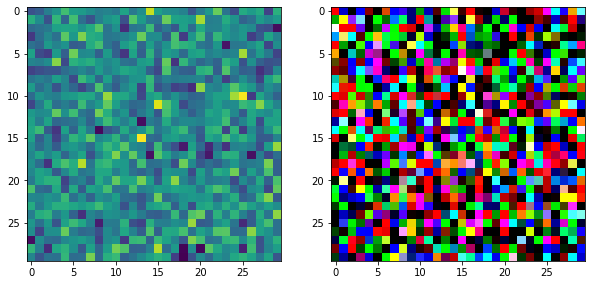

In [18]:
# Create image and apply maxpooling

# create a 2D and a 3D image
img2 = torch.randn(1,1,30,30) # Grayscale 
img3 = torch.randn(1,3,30,30) # RGB

fig,axs = plt.subplots(1,2,figsize=(10,5))

img2view = img2.permute(2,3,1,0).numpy()
axs[0].imshow(np.squeeze(img2view));

img3view = img3.permute(2,3,1,0).numpy()
axs[1].imshow(np.squeeze(img3view));

In [23]:
# all combinations of image and maxpool dimensionality

img2Pool2 = maxPool2d(img2)
print(f'2D image, 2D maxpool: {img2Pool2.shape}\n' )

# it is not possible to apply 3D max pooling to 2D image.
# img2Pool3 = maxPool3d(img2)
# print(f'2D image, 3D maxpool: {img2Pool2.shape}\n' )

img3Pool2 = p2(img3)
print(f'3D image, 2D maxpool: {img3Pool2.shape}\n' )

img3Pool3 = p3(img3)
print(f'3D image, 3D maxpool: {img3Pool3.shape}\n' )

2D image, 2D maxpool: torch.Size([1, 1, 10, 10])

3D image, 2D maxpool: torch.Size([1, 3, 10, 10])

3D image, 3D maxpool: torch.Size([1, 1, 10, 10])



In [25]:
# Create a simple CNN

cnnModel = nn.Sequential(
    
    # the convolution pooling block
    nn.Conv2d(3,10,5,3,2), # convolution layer, 3 = input Channels, 10 output Channels = Number Of Kernels = Feature Maps, 5 Kernel Size, 3 Stride, 2 padding
    nn.ReLU(),                   # activation function
    nn.AvgPool3d(3,3),     # average-pool

    ## the FFN block
    nn.Flatten(),              # vectorize to get from image to linear
    nn.Linear(588,1),      # FC linear layer
    nn.Sigmoid()             # output activation
)

In [36]:
# test with a bit of data

img = torch.rand(1,3,128,128)

conv2d =  nn.Conv2d(3,10,5,3,2)
convResult = conv2d(img)
pool = nn.AvgPool3d(3,3)
poolResult  = pool(convResult)
print(convResult.shape)
print(poolResult.shape) # Why nn.Linear = 588, 14*14*3 = 588

torch.Size([1, 10, 43, 43])
torch.Size([1, 3, 14, 14])
